In [3]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

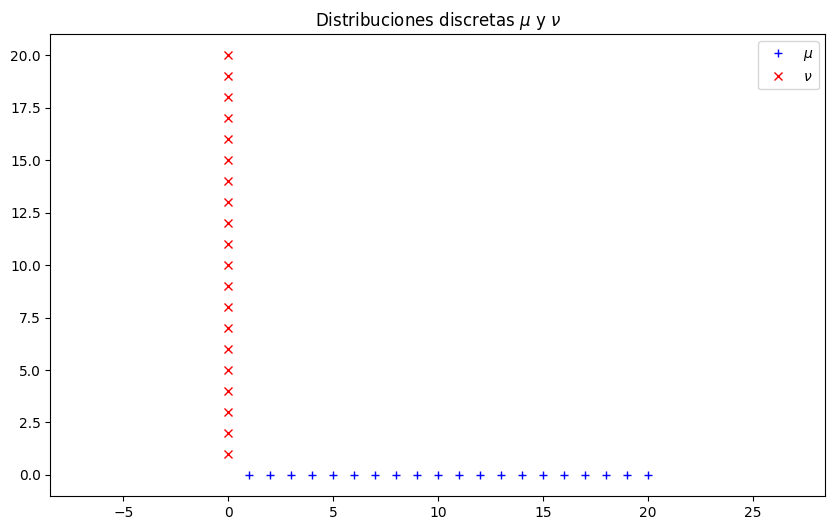

In [11]:
n = 20 # Cantidad de muestras
xs = np.zeros((n, 2))
xs[:, 0] = np.arange(n) + 1
xs[:, 1] = (np.arange(n) + 1) * -0.001  # Movemos un poco los datos verticales para que el conjunto sea extrictamente convexo

xt = np.zeros((n, 2))
xt[:, 1] = np.arange(n) + 1

a, b = ot.unif(n), ot.unif(n)  # Sampleamos uniformemente sobre los bins n

pl.figure(1, figsize=(10, 6))
pl.clf()
pl.plot(xs[:, 0], xs[:, 1], '+b', label=r'$\mu$')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.title(r'Distribuciones discretas $\mu$ y $\nu$')
pl.legend()


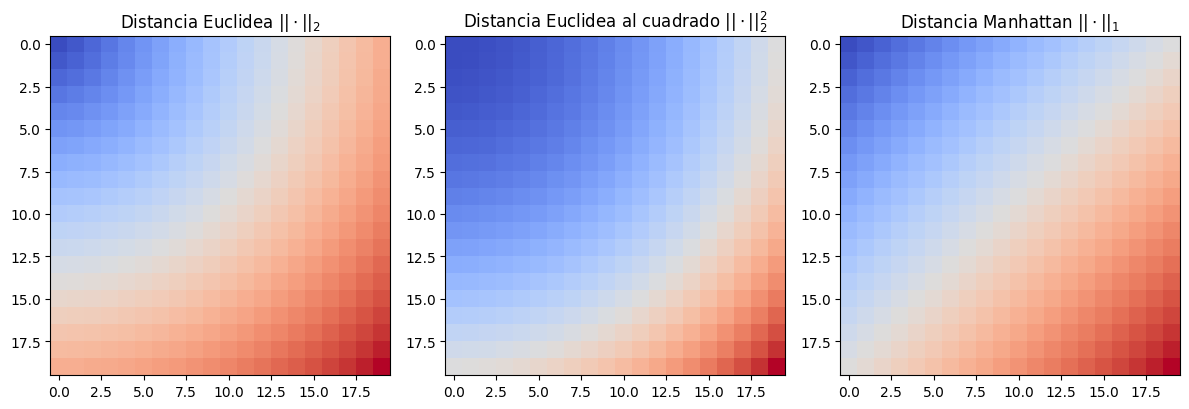

In [12]:
# Calculamos la matriz de costo utilizando 3 distancias distinas:
# Euclidea, Euclidea al cuadrado y la distancia city block (L1)

M_e = ot.dist(xs, xt, metric='euclidean')
M_e /= M_e.max()

M_e2 = ot.dist(xs, xt, metric='sqeuclidean')
M_e2 /= M_e2.max()

M_c = ot.dist(xs, xt, metric='cityblock')
M_c /= M_c.max()


pl.figure(1, figsize=(12, 6))

pl.subplot(1, 3, 1)
pl.imshow(M_e, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Euclidea $|| \cdot ||_2$')

pl.subplot(1, 3, 2)
pl.imshow(M_e2, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Euclidea al cuadrado $|| \cdot ||_2^2$')

pl.subplot(1, 3, 3)
pl.imshow(M_c, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Manhattan $|| \cdot ||_1$')


pl.tight_layout()

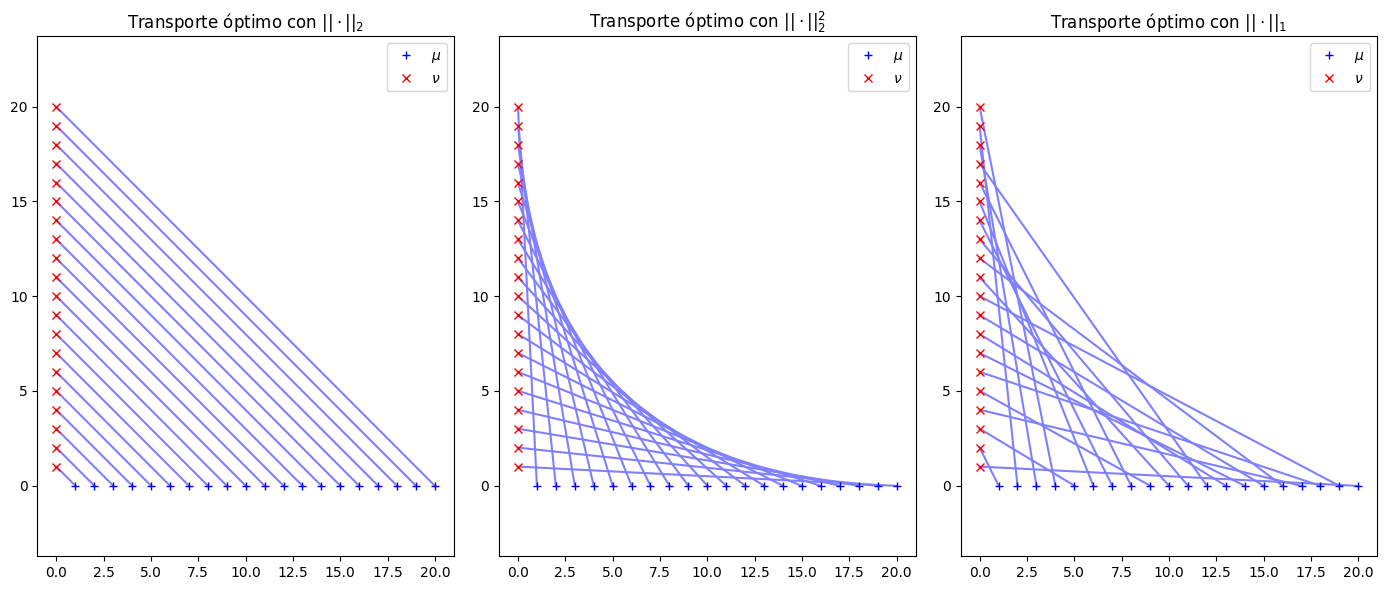

In [13]:
# Resolvemos el problema de Monge
G1 = ot.emd(a, b, M_e)
G2 = ot.emd(a, b, M_e2)
Gp = ot.emd(a, b, M_c)


pl.figure(3, figsize=(14, 6))

pl.subplot(1, 3, 1)
ot.plot.plot2D_samples_mat(xs, xt, G1, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label=r'$\mu$')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_2$')

pl.subplot(1, 3, 2)
ot.plot.plot2D_samples_mat(xs, xt, G2, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label=r'$\mu$')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_2^2$')

pl.subplot(1, 3, 3)
ot.plot.plot2D_samples_mat(xs, xt, Gp, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label=r'$\mu$')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_1$')
pl.tight_layout()

pl.show()

In [11]:
2 * np.pi * np.random.rand(1000)

6.2815105940224685

---
#### Ejemplo en $S^1$
---

In [42]:
def generar_puntos_circulo(cantidad_puntos = 100, r = 1):
    
    theta = np.random.uniform(0, 2*np.pi, cantidad_puntos)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y


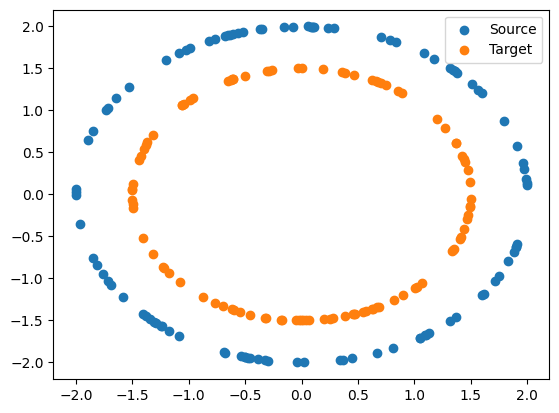

In [71]:
import matplotlib.pyplot as plt
xs, ys = generar_puntos_circulo(r=2)
xt, yt = generar_puntos_circulo(r=1.5)

plt.scatter(xs, ys, label = "Source")
plt.scatter(xt, yt, label = "Target")
plt.legend()

Xs = np.column_stack((xs, ys))
Xt = np.column_stack((xt, yt))


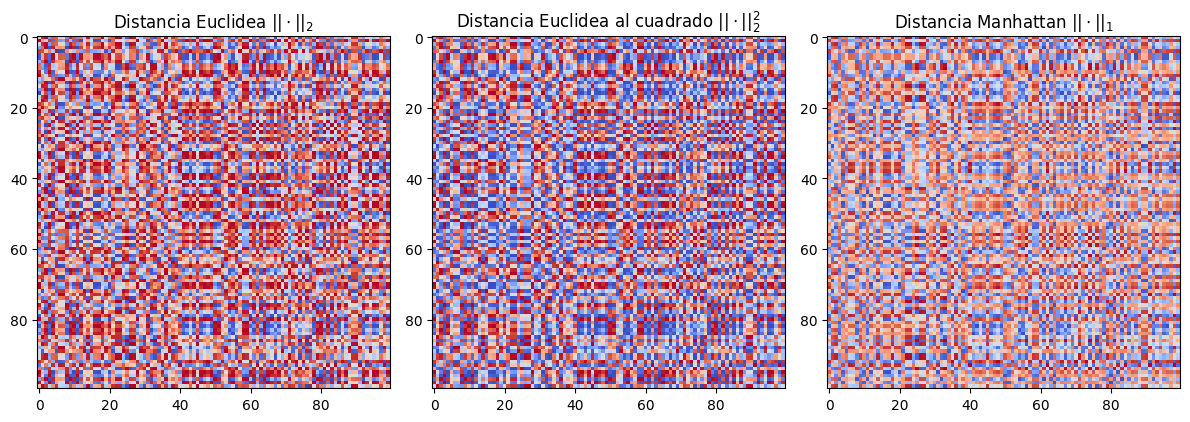

In [72]:
Ms_e = ot.dist(Xs, Xt, metric='euclidean')
Ms_e /= Ms_e.max()

Ms_e2 = ot.dist(Xs, Xt, metric='sqeuclidean')
Ms_e2 /= Ms_e2.max()

Ms_c = ot.dist(Xs, Xt, metric='cityblock')
Ms_c /= Ms_c.max()

pl.figure(1, figsize=(12, 6))

pl.subplot(1, 3, 1)
pl.imshow(Ms_e, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Euclidea $|| \cdot ||_2$')

pl.subplot(1, 3, 2)
pl.imshow(Ms_e2, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Euclidea al cuadrado $|| \cdot ||_2^2$')

pl.subplot(1, 3, 3)
pl.imshow(Ms_c, interpolation='nearest', cmap='coolwarm')
pl.title(r'Distancia Manhattan $|| \cdot ||_1$')


pl.tight_layout()


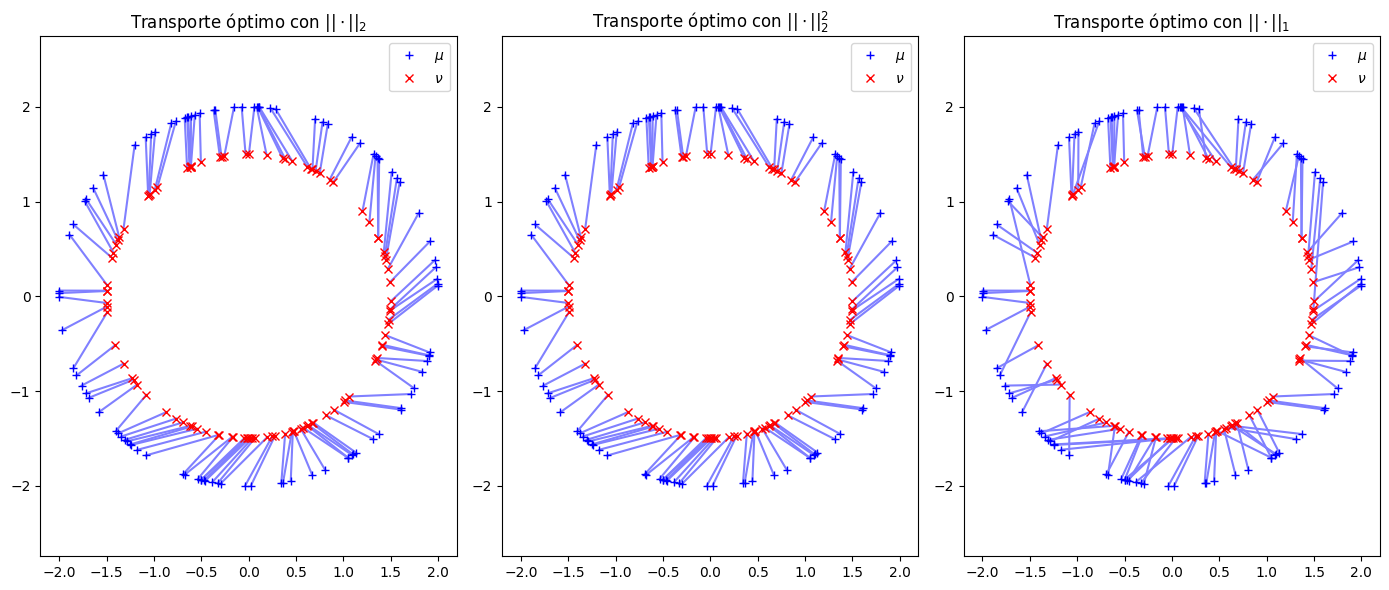

In [89]:
# Consideramos una distribución uniforme sobre los puntos
a = np.ones(Xs.shape[0]) / Xs.shape[0]
b = np.ones(Xt.shape[0]) / Xt.shape[0]

# Resolvemos el problema de Monge
G1 = ot.emd(a, b, Ms_e)
G2 = ot.emd(a, b, Ms_e2)
Gp = ot.emd(a, b, Ms_c)


pl.figure(3, figsize=(14, 6))

pl.subplot(1, 3, 1)
ot.plot.plot2D_samples_mat(Xs, Xt, G1, c=[.5, .5, 1])
pl.plot(Xs[:, 0], Xs[:, 1], '+b', label=r'$\mu$')
pl.plot(Xt[:, 0], Xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_2$')

pl.subplot(1, 3, 2)
ot.plot.plot2D_samples_mat(Xs, Xt, G2, c=[.5, .5, 1])
pl.plot(Xs[:, 0], Xs[:, 1], '+b', label=r'$\mu$')
pl.plot(Xt[:, 0], Xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_2^2$')

pl.subplot(1, 3, 3)
ot.plot.plot2D_samples_mat(Xs, Xt, Gp, c=[.5, .5, 1])
pl.plot(Xs[:, 0], Xs[:, 1], '+b', label=r'$\mu$')
pl.plot(Xt[:, 0], Xt[:, 1], 'xr', label=r'$\nu$')
pl.axis('equal')
pl.legend(loc=0)
pl.title(r'Transporte óptimo con $|| \cdot ||_1$')
pl.tight_layout()

pl.show()